In [ ]:
!pip install pyfolio 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyfolio as pf

In [ ]:
# Import necessary libraries
import math
# !pip install yfinance 
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
import datetime
from datetime import datetime

In [ ]:
import matplotlib.ticker as mtick

In [ ]:
import mplfinance as mpf

In [ ]:
equities = [
'VUG',
'VFIAX',
'SOXX',
'VHT',
'VIMAX',
'GRID',
'IXN',
'TAN',
'VYM',
]
end = datetime.now()
#Start date set to 10 year back
start = datetime(end.year-5,end.month,end.day) 
pricedata = yf.download(equities,start,end)['Adj Close']
n_equities = len(equities)

[*********************100%***********************]  9 of 9 completed


In [ ]:
# pricedata.reset_index(inplace=True)

In [ ]:
# n_equities


In [ ]:
# Create plot traces
traces = []
for equity in equities:
    trace = go.Scatter(x=pricedata.index, y=pricedata[equity], name=equity)
    traces.append(trace)

# Create plot layout
layout = go.Layout(
    title='Adj Close Prices of Stocks',
    xaxis_title='Date',
    yaxis_title='Price',
    title_font_size=20,
    xaxis_tickfont_size=12,
    yaxis_tickfont_size=12,
    width=1000,
    height=600,
)

# Create figure and add traces/layout
fig = go.Figure(data=traces, layout=layout)

# Show plot
fig.show()

**Pyfolio BackTesting**

/usr/local/lib/python3.9/dist-packages/pyfolio/timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:648: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Start date,2018-04-23
End date,2023-04-20
Total months,59
,Backtest
Annual return,15.6%
Cumulative returns,106.2%
Annual volatility,24.0%
Sharpe ratio,0.73
Calmar ratio,0.44
Stability,0.82
Max drawdown,-35.1%


/usr/local/lib/python3.9/dist-packages/pyfolio/plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



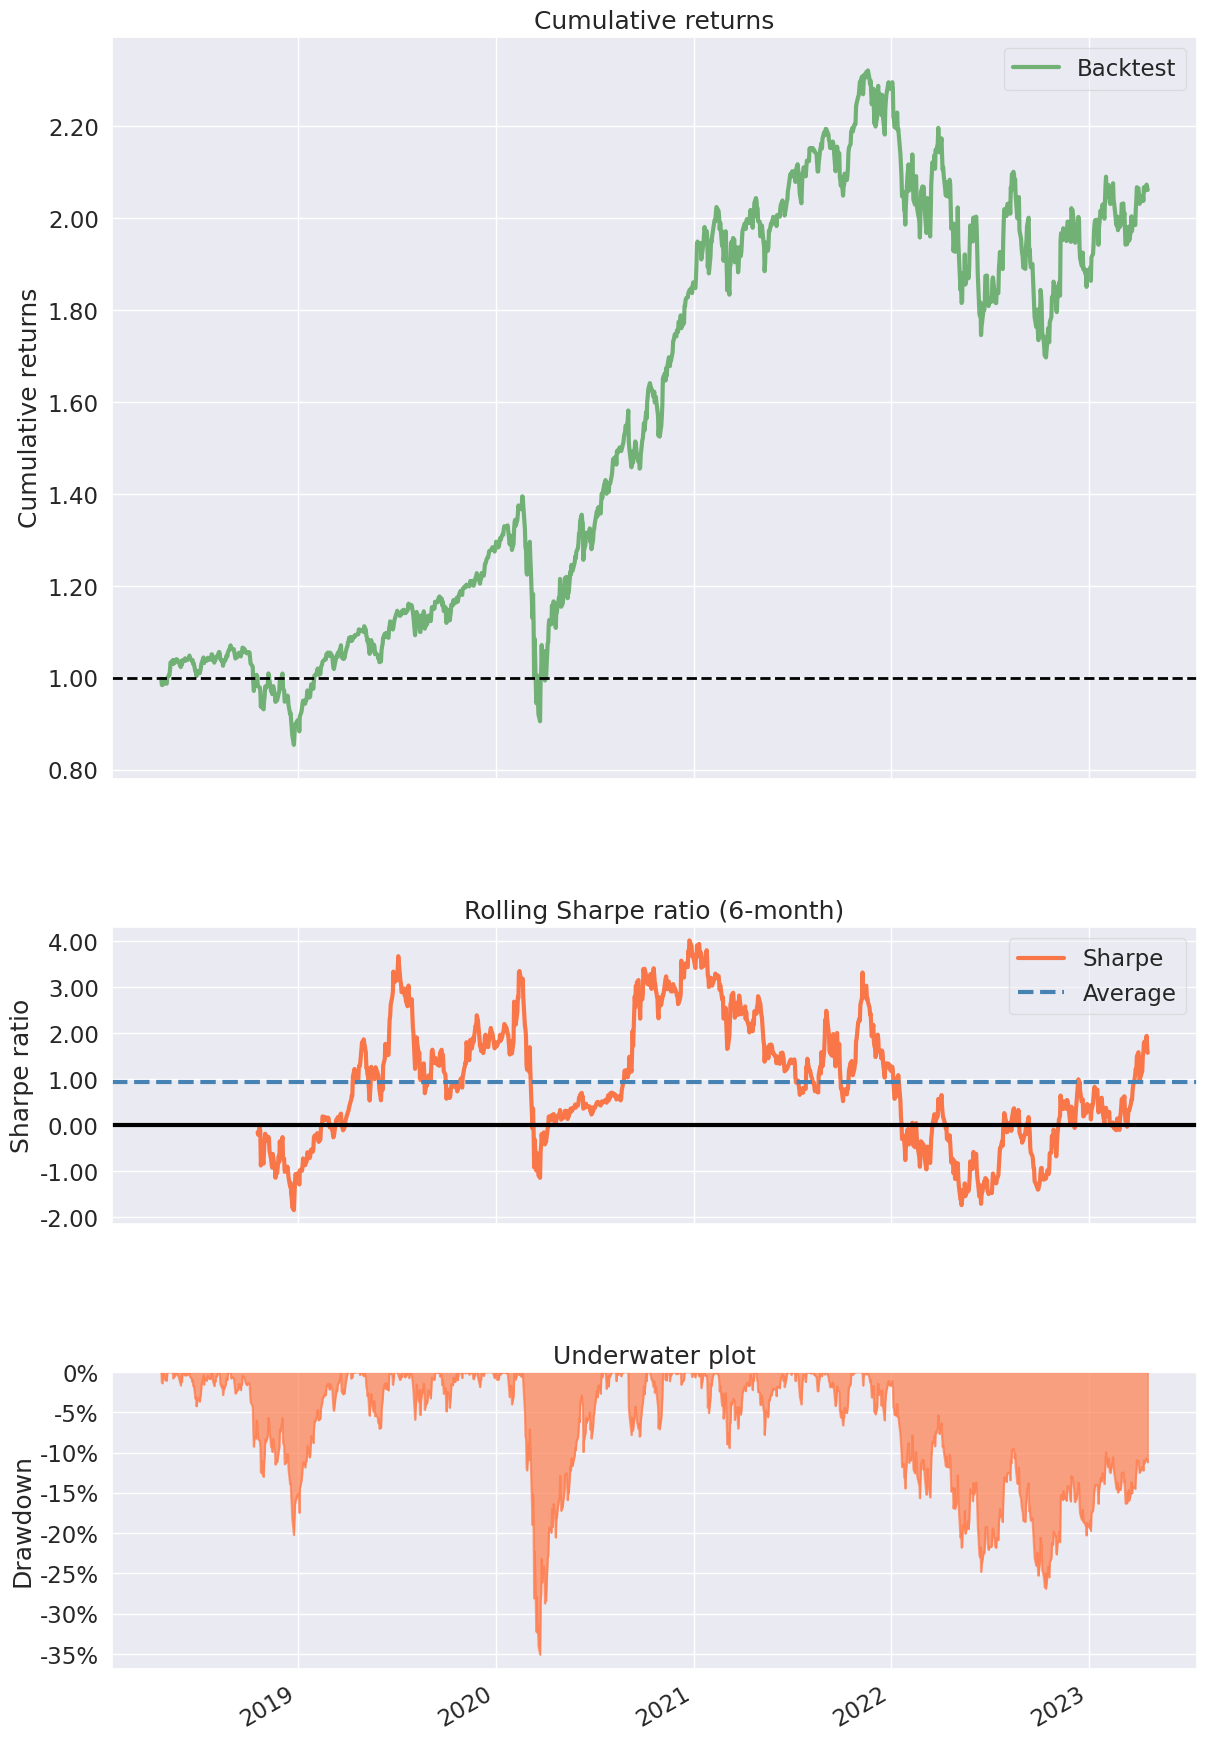

In [ ]:
# Calculate the daily returns of the equity prices
returns = pricedata.pct_change().dropna()

# Create a list of portfolio weights where each equity has an equal weight
portfolio_weights = n_equities * [1 / n_equities]

# Calculate the daily portfolio returns as the dot product of the portfolio weights and the equity returns
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T), index=returns.index)

# Generate a simple tear sheet using Pyfolio to analyze the portfolio returns
pf.create_simple_tear_sheet(portfolio_returns)


**Analysis of Daily Returns and Covariance of Equity Prices**

In [ ]:
# Define the number number of trading days per year
N_DAYS = 252

# Calculate the daily returns of the equity prices
returns = pricedata.pct_change().dropna()

# Calculate the average daily return of each equity multiplied by the number of trading days in a year
avg_returns = returns.mean() * N_DAYS

# Calculate the covariance matrix of the equity returns multiplied by the number of trading days in a year
cov_mat = returns.cov() * N_DAYS



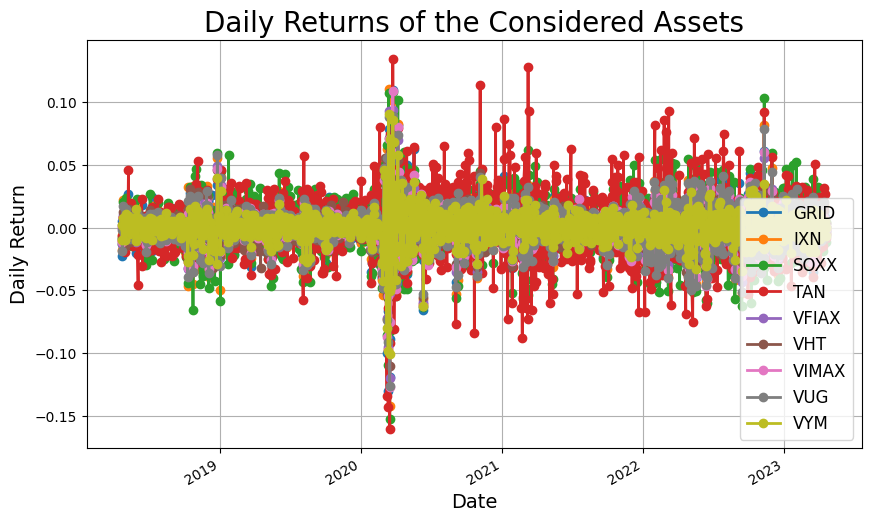

In [ ]:
# Create a line plot of the daily returns of the equity prices
ax = returns.plot(title='Daily Returns of the Considered Assets', figsize=(10, 6), grid=True, linewidth=2, style='-o')

# Set the font size of the title and axis labels
plt.title('Daily Returns of the Considered Assets', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Daily Return', fontsize=14)

# Change the color and style of the plot line
lines = ax.lines
for i in range(len(lines)):
    lines[i].set_linestyle('-')
    lines[i].set_linewidth(2)
    lines[i].set_color('C' + str(i))

# Add a legend to the plot
plt.legend(pricedata.columns, fontsize=12)

# Display the plot
plt.show()

**Monte Carlo Simulation for Portfolio Optimization**

In [ ]:
# Define the number of portfolios to generate
N_PORTFOLIOS = 5 * 10 ** 5

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate random portfolio weights for each of the equities
weights = np.random.random(size=(N_PORTFOLIOS, n_equities))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

# Calculate the portfolio returns using the randomly generated weights and the average daily returns of each equity
portf_rtns = np.dot(weights, avg_returns)

# Calculate the portfolio volatility using the randomly generated weights and the covariance matrix of the equity returns
portf_vol = []
for i in range(len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)

# Calculate the Sharpe ratio for each portfolio
portf_sharpe_ratio = portf_rtns / portf_vol

# Create a DataFrame to store the results
portf_results_df = pd.DataFrame({'returns': portf_rtns,
                                 'volatility': portf_vol,
                                 'sharpe_ratio': portf_sharpe_ratio})
# Add the weights to the DataFrame
for i, equity in enumerate(equities):
    portf_results_df[equity] = weights[:, i]
    
# Drop any rows with missing values
portf_results_df.dropna(inplace=True)

In [ ]:
portf_results_df.head()

,returns,volatility,sharpe_ratio,VUG,VFIAX,SOXX,VHT,VIMAX,GRID,IXN,TAN,VYM
0,0.191444,0.257673,0.742970,0.083355,0.211585,0.162908,0.133234,0.034723,0.034717,0.012927,0.192771,0.133780
1,0.206350,0.267250,0.772122,0.179824,0.005228,0.246322,0.211410,0.053926,0.046177,0.046578,0.077266,0.133269
2,0.169474,0.244053,0.694415,0.120859,0.081487,0.171198,0.039031,0.081743,0.102509,0.127610,0.219694,0.055869
3,0.162272,0.237420,0.683481,0.108968,0.125535,0.009843,0.128741,0.036135,0.013785,0.201072,0.204621,0.171302
4,0.189225,0.252570,0.749198,0.091028,0.029187,0.204470,0.131531,0.036469,0.147974,0.010276,0.271733,0.077331


**Efficient Frontier and Asset Allocation of a Portfolio**

In [ ]:
# Locate the points creating the Efficient Frontier:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []

portf_rtns_ef = np.linspace(portf_results_df.returns.min(), 
                            portf_results_df.returns.max(), 
                            N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)    
portf_rtns = np.round(portf_rtns, 2)

for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
    
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)


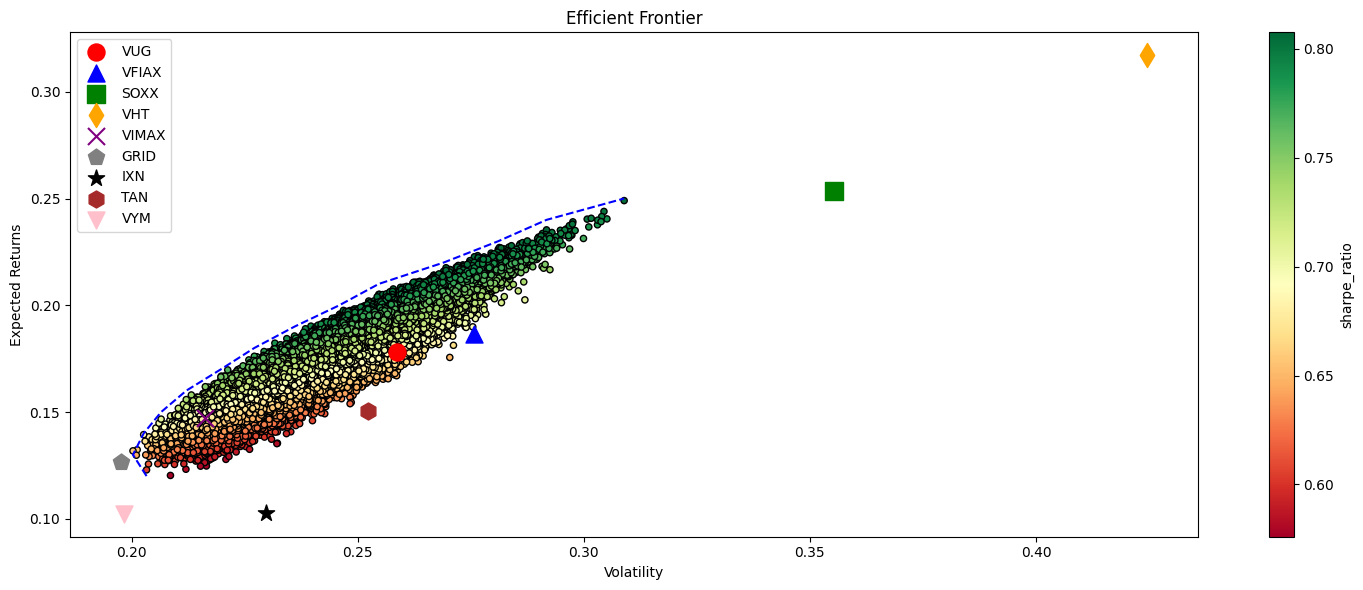

In [ ]:
MARKERS = ['o', '^', 's', 'd', 'x', 'p', '*', 'h', 'v', '+']
COLORS = ['red', 'blue', 'green', 'orange', 'purple', 'gray', 'black', 'brown', 'pink', 'teal']

fig, ax = plt.subplots(figsize=(15,6))
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)
ax.set(xlabel='Volatility', 
       ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_equities):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                y=avg_returns[asset_index], 
                marker=MARKERS[asset_index], 
                s=150, 
                color=COLORS[asset_index],
                label=equities[asset_index])
ax.legend()

plt.tight_layout()
plt.show()

**Portfolio Performance Analysis and Selection**

In [ ]:
# Find the index of the portfolio with the maximum Sharpe ratio
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)

# Select the portfolio with the maximum Sharpe ratio
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]

# Find the index of the portfolio with the minimum volatility
min_vol_ind = np.argmin(portf_results_df.volatility)

# Select the portfolio with the minimum volatility
min_vol_portf = portf_results_df.loc[min_vol_ind]

# Find the index of the portfolio with the maximum return
max_ret_ind = np.argmax(portf_results_df.returns)

# Select the portfolio with the maximum return
max_ret_portf = portf_results_df.loc[max_ret_ind]

# Find the index of the portfolio with the minimum return
min_ret_ind = np.argmin(portf_results_df.returns)

# Select the portfolio with the minimum return
min_ret_portf = portf_results_df.loc[min_ret_ind]


In [ ]:
print('Maximum Sharpe Ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(equities, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

print('\nMinimum Volatility portfolio ----')
print('Performance')
for index, value in min_vol_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(equities, weights[np.argmin(portf_results_df.volatility)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

print('\nMaximum Return portfolio ----')
print('Performance')
for index, value in max_ret_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(equities, weights[np.argmax(portf_results_df.returns)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

print('\nMinimum Return portfolio ----')
print('Performance')
for index, value in min_ret_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(equities, weights[np.argmin(portf_results_df.returns)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe Ratio portfolio ----
Performance
returns: 22.27% volatility: 27.58% sharpe_ratio: 80.75% VUG: 3.34% VFIAX: 5.55% SOXX: 29.29% VHT: 29.21% VIMAX: 0.53% GRID: 24.06% IXN: 0.79% TAN: 0.20% VYM: 7.03% 
Weights
VUG: 3.34% VFIAX: 5.55% SOXX: 29.29% VHT: 29.21% VIMAX: 0.53% GRID: 24.06% IXN: 0.79% TAN: 0.20% VYM: 7.03% 
Minimum Volatility portfolio ----
Performance
returns: 13.18% volatility: 20.03% sharpe_ratio: 65.81% VUG: 5.19% VFIAX: 0.62% SOXX: 0.28% VHT: 2.95% VIMAX: 13.44% GRID: 28.82% IXN: 0.39% TAN: 10.80% VYM: 37.51% 
Weights
VUG: 5.19% VFIAX: 0.62% SOXX: 0.28% VHT: 2.95% VIMAX: 13.44% GRID: 28.82% IXN: 0.39% TAN: 10.80% VYM: 37.51% 
Maximum Return portfolio ----
Performance
returns: 24.90% volatility: 30.89% sharpe_ratio: 80.61% VUG: 3.01% VFIAX: 6.14% SOXX: 36.05% VHT: 37.92% VIMAX: 0.68% GRID: 10.00% IXN: 1.91% TAN: 1.21% VYM: 3.09% 
Weights
VUG: 3.01% VFIAX: 6.14% SOXX: 36.05% VHT: 37.92% VIMAX: 0.68% GRID: 10.00% IXN: 1.91% TAN: 1.21% VYM: 3.09% 
Minimum Return p

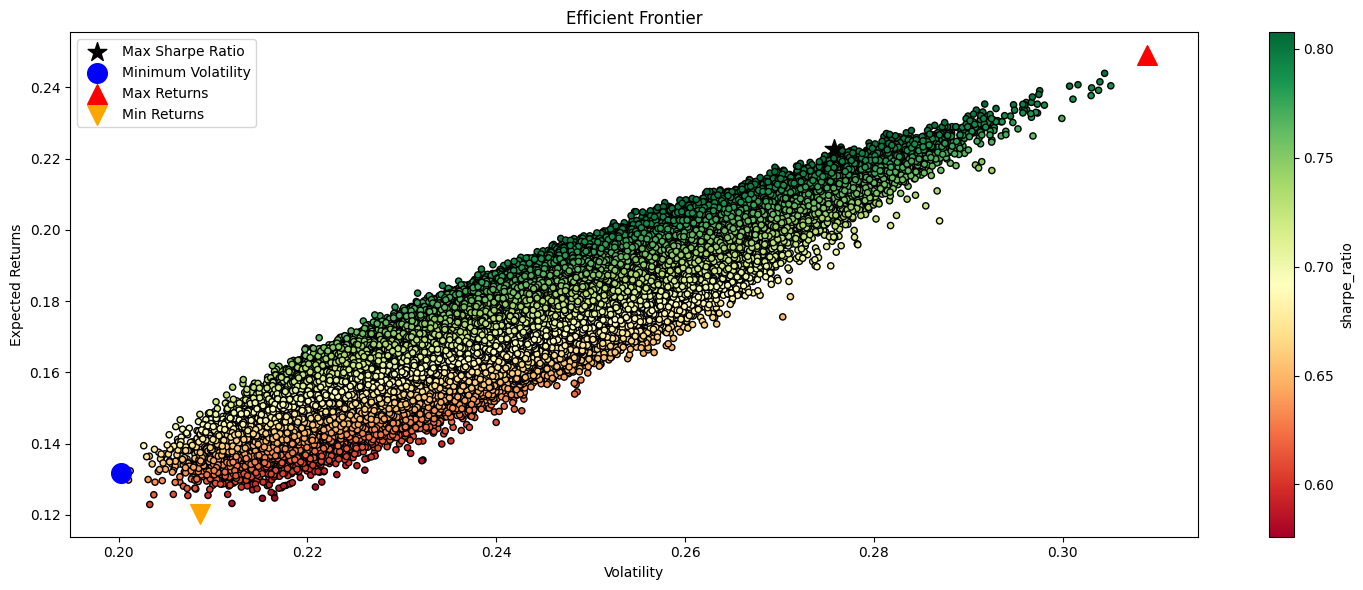

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))

# scatter plot of all portfolios
portf_results_df.plot(kind='scatter', x='volatility', 
                      y='returns', c='sharpe_ratio',
                      cmap='RdYlGn', edgecolors='black', 
                      ax=ax)

# plot portfolio with maximum Sharpe ratio
ax.scatter(x=max_sharpe_portf.volatility, 
           y=max_sharpe_portf.returns, 
           c='black', marker='*', 
           s=200, label='Max Sharpe Ratio')

# plot portfolio with minimum volatility
ax.scatter(x=min_vol_portf.volatility, 
           y=min_vol_portf.returns, 
           c='blue', marker='o', 
           s=200, label='Minimum Volatility')

# plot portfolio with maximum returns
ax.scatter(x=max_ret_portf.volatility, 
           y=max_ret_portf.returns, 
           c='red', marker='^', 
           s=200, label='Max Returns')

# plot portfolio with minimum returns
ax.scatter(x=min_ret_portf.volatility, 
           y=min_ret_portf.returns, 
           c='orange', marker='v', 
           s=200, label='Min Returns')

ax.set(xlabel='Volatility', ylabel='Expected Returns', 
       title='Efficient Frontier')
ax.legend()

plt.tight_layout()
plt.show()


**Efficient Frontier Plotting and Portfolio Optimization with Convex Optimization**

In [ ]:
!pip install cvxpy
import cvxpy as cp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


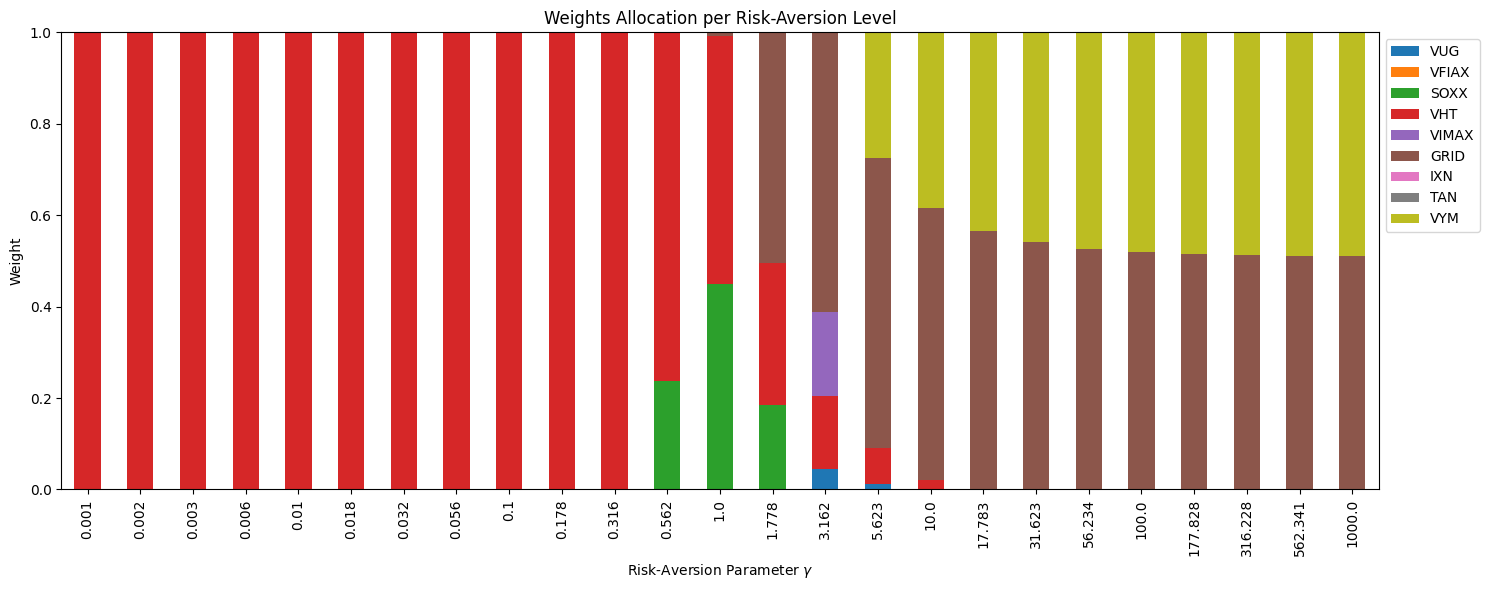

In [ ]:
# Convert the annualized average returns and the covariance matrix to numpy arrays:
avg_returns = np.array(avg_returns)
weights = np.array(weights)

# Set up the optimization problem:
weights = cp.Variable(n_equities)
gamma = cp.Parameter(nonneg=True)
portf_rtn_cvx = avg_returns @ weights 
portf_vol_cvx = cp.quad_form(weights, cov_mat)
objective_function = cp.Maximize(portf_rtn_cvx - gamma * portf_vol_cvx)
problem = cp.Problem(objective_function, 
                     [cp.sum(weights) == 1, weights >= 0])

# Calculate the Efficient Frontier:
N_POINTS = 25
portf_rtn_cvx_ef = np.zeros(N_POINTS)
portf_vol_cvx_ef = np.zeros(N_POINTS)
weights_ef = []
gamma_range = np.logspace(-3, 3, num=N_POINTS)

for i in range(N_POINTS):
    gamma.value = gamma_range[i]
    problem.solve()
    portf_vol_cvx_ef[i] = cp.sqrt(portf_vol_cvx).value
    portf_rtn_cvx_ef[i] = portf_rtn_cvx.value
    weights_ef.append(weights.value)

# Plot the allocation for different values of the risk-aversion parameter:
weights_df = pd.DataFrame(weights_ef, 
                          columns=equities, 
                          index=np.round(gamma_range, 3))

ax = weights_df.plot(kind='bar', stacked=True, figsize=(15, 6)) 
ax.set(title='Weights Allocation per Risk-Aversion Level',
       xlabel=r'Risk-Aversion Parameter $\gamma$', 
       ylabel='Weight')
ax.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Define the portfolio optimization problem
w = cp.Variable(n_equities) # weights for each equity in the portfolio
ret = w @ avg_returns # expected portfolio returns
risk = cp.quad_form(w, cov_mat) # portfolio variance
gamma = cp.Parameter(nonneg=True) # regularization parameter

objective = cp.Maximize(ret - gamma * risk)
constraints = [cp.sum(w) == 1, w >= 0]

# Define a range of gamma values to compute the efficient frontier
n_points = 100
gamma_range = np.logspace(-2, 2, num=n_points)

# Solve the optimization problem for each gamma value
portfolios = []
for i in range(n_points):
    gamma.value = gamma_range[i]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    portfolios.append((np.sqrt(risk.value), ret.value, w.value))

# Extract the efficient frontier from the computed portfolios
portf_vol_cvx_ef = [p[0] for p in portfolios]
portf_rtn_cvx_ef = [p[1] for p in portfolios]


In [ ]:
# Print portfolio allocations and rate of return/volatility for each portfolio on the efficient frontier
for i, p in enumerate(portfolios):
    print("Portfolio", i+1, "allocations and performance:")
    print("Expected rate of return: {:.2f}%".format(p[1]*100))
    print("Volatility: {:.2f}%".format(p[0]*100))
    for j, asset in enumerate(equities):
        if abs(p[2][j]) > 1e-5:
            print(asset, ": {:.2f}%".format(p[2][j]*100))
    print()



Portfolio 1 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 2 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 3 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 4 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 5 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 6 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 7 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 8 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 9 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 10 allocations and performa

In [ ]:
# Define the desired return
ret_desired = 0.1319

# Find all portfolios that achieve the desired return or higher
desired_portfolios = [p for p in portfolios if p[1] >= ret_desired]

# Print the portfolio allocations and performance for each desired portfolio
for i, p in enumerate(desired_portfolios):
    print("Portfolio", i+1, "allocations and performance:")
    print("Expected rate of return: {:.2f}%".format(p[1]*100))
    print("Volatility: {:.2f}%".format(p[0]*100))
    for j, asset in enumerate(equities):
        if abs(p[2][j]) > 1e-5:
            print(asset, ": {:.2f}%".format(p[2][j]*100))
    print()


Portfolio 1 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 2 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 3 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 4 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 5 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 6 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 7 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 8 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 9 allocations and performance:
Expected rate of return: 31.71%
Volatility: 42.45%
VHT : 100.00%

Portfolio 10 allocations and performa

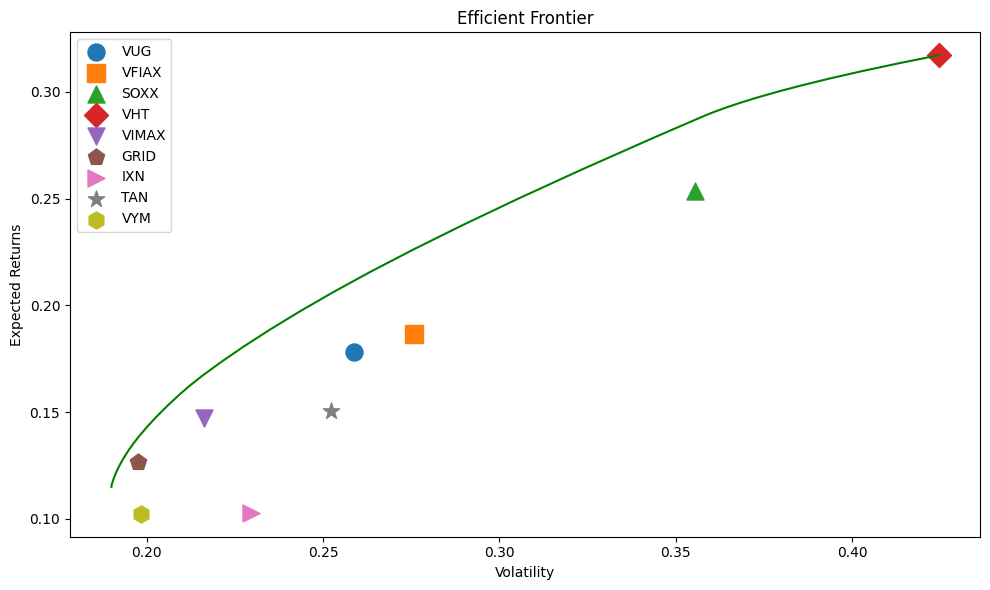

In [ ]:
MARKS = ['o', 's', '^', 'D', 'v', 'p', '>', '*', 'h']

fig, ax = plt.subplots(figsize = (10,6))
ax.plot(portf_vol_cvx_ef, portf_rtn_cvx_ef, 'g-')
for asset_index in range(n_equities):
     plt.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), 
                 y=avg_returns[asset_index], 
                 marker=MARKS[asset_index], 
                 label=equities[asset_index],
                 s=150)
ax.set(title='Efficient Frontier',
       xlabel='Volatility', 
       ylabel='Expected Returns', )
ax.legend()

plt.tight_layout()
plt.show()
     

In [ ]:
import numpy as np
from scipy.optimize import minimize

In [ ]:
# Define the objective function and constraints
def objective_function(w, avg_returns, cov_mat, gamma):
    ret = w @ avg_returns
    risk = w @ cov_mat @ w
    return -(ret - gamma * risk)

def constraint_1(w):
    return np.sum(w) - 1

def constraint_2(w):
    return w


IndexError: ignored

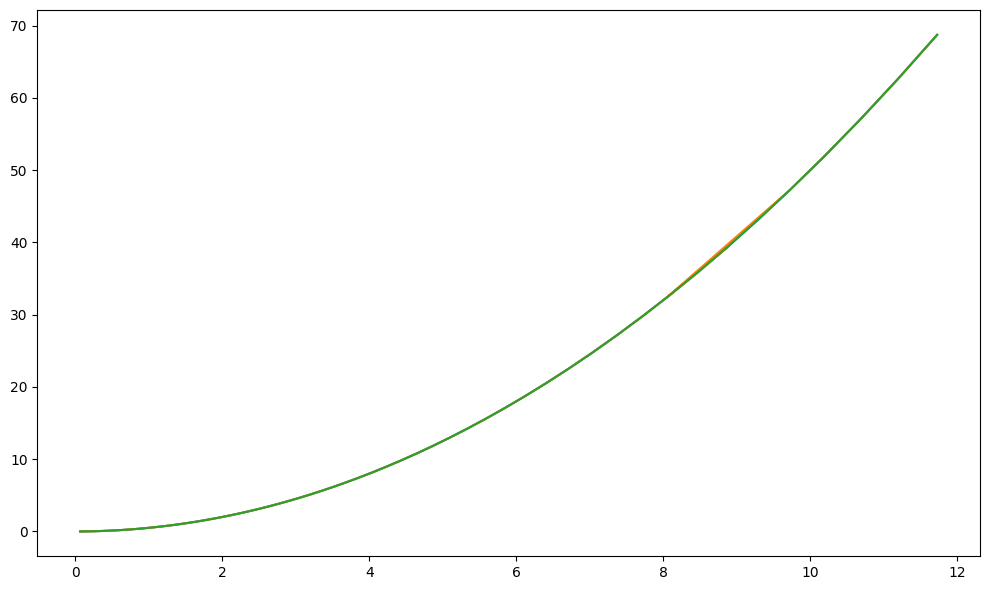

In [ ]:
# Plot the efficient frontier for different levels of maximum leverage
plt.figure(figsize=(10, 6))
for leverage_index, leverage in enumerate():
    plt.plot(portf_vol_l_ef[:, leverage_index], 
             portf_rtn_l_ef[:, leverage_index], 
             label=f'{leverage}')

ax.set(title='Efficient Frontier for different max leverage',
       xlabel='Volatility', 
       ylabel='Expected Returns')
ax.legend(title='Max leverage')

plt.tight_layout()
plt.show()